Age
Sex : male : 1
female : 0

chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

resting blood pressure (in mm Hg on admission to the hospital

serum cholestoral in mg/dl

(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

resting electrocardiographic results

-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exercise induced angina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

--Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

Target : 0 No Heart disease
1 Heart disease

# Heart Disease Prediction

# Binary Classification Problem

# Target Variables 

# 1: Heart disease ,  0: No Heart Disease

# 1. Importing Essential Libraries

# 2. Import Dataset

# 3. Exploratory Data Analysis

### a. Check shape of Dataset

### b. precview the dataset

### c. summary of the dataset

### d. Description of Dataset

### e. check data types of column

### f. important points about dataset

### g. statistical properties of dataset

### h. view column Names

# 4. Univariate Analysis

### a. Analysis od target feature Variables

### b. Finding of univariate Variables

# 5. Bivariate Analysis

### a. Estimate correlation cofficients

### b. Analysis of target variable and cp variables

### c. Analysis of target variable and thalach variables

### d. Findings of bivariate Analysis

# 6. Multivariate Analysis

### Heatmap

# 7. Train Test Split

# 8.Fiting the classifer

# 9. Predication

# 10. Comparison of Different Classifers

# 11. Input to the model

# 12. Generate pickle File

# 13. web app using Streamlit

# 14. Deployement

# Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings

C:\Users\usama\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing The Dataset

In [2]:
df = pd.read_csv("heart.csv")

#### verifying it is a "dataframe" object in pandas

In [3]:
type(df)

pandas.core.frame.DataFrame

# Exploratory Data Analysis

In [4]:
#shape of the dataset
df.shape

(303, 14)

# Feature of the dataset i.e Columns of Dataset

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Preview the dataset to understand the data

#### printing out dfirst 5 rows of dataset

In [6]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Gerenrate 5 sample rows or column

In [7]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1


##### Checking Null Values

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Univariate Analysis

#### our feature of interest is target  Variables

In [9]:
print("Total No Of Diseases")
print(len(df.target.unique()))

Total No Of Diseases
2


In [10]:
#looking at unique values
df["target"].unique()
# 1 for heart disease
# 0 for no disease

array([1, 0], dtype=int64)

In [11]:
# frequency distribution of target variable
# number of instances (rows) that belong to each class
df.groupby("target").size()

target
0    138
1    165
dtype: int64

since target variable have two values i.e 0 or 1


so this is a classification problem


binary classification problem


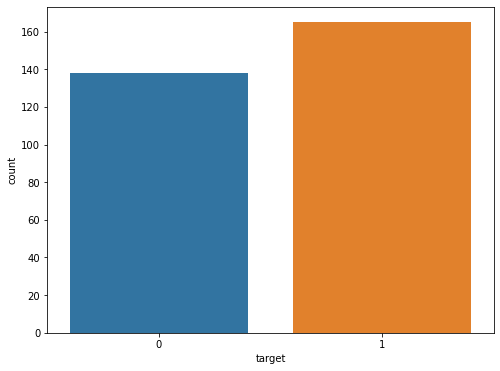

In [12]:
#visualizing the frequency distribution
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="target", data=df)
plt.show()

# Frequency distribution of "target" variable w.r.t. fdifferent features

In [13]:
# Frequency distribution of "target" variable w.r.t. fdifferent features
# how many males and females are there in dataset
df.groupby('sex')['target'].value_counts()
#sex 0 females and 1 males

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

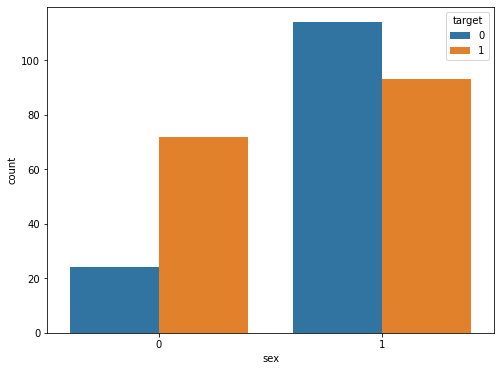

In [14]:
#visualizing the frequency distribution
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='sex', hue='target', data=df)
plt.show()

###  Finding of univariate Variables

# Discription

### Statistics of Dataset

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
#getting information about the attributes and thier datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
info = ["age","1: male, 0: Female","Chest Pain Type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomic","resting blood pressure","serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl--------------> 1 = true 0 = false,","resting Electro-Cardio-Graphic results","Maximum heart rate achieved","exercise induced angina ----> 1 = yes; 0 = no","ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment --Value 1: upsloping -- Value 2: flat -- Value 3: downsloping","vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy","A blood disorder called thalassemia ------> 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
        print(df.columns[i]+"\t\t\t"+info[i])

        

age			age
sex			1: male, 0: Female
cp			Chest Pain Type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomic
trestbps			resting blood pressure
chol			serum cholestoral in mg/dl
fbs			fasting blood sugar > 120 mg/dl--------------> 1 = true 0 = false,
restecg			resting Electro-Cardio-Graphic results
thalach			Maximum heart rate achieved
exang			exercise induced angina ----> 1 = yes; 0 = no
oldpeak			ST depression induced by exercise relative to rest
slope			the slope of the peak exercise ST segment --Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
ca			vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy
thal			A blood disorder called thalassemia ------> 3 = normal; 6 = fixed defect; 7 = reversable defect


# Class Label or target variable

### analysing the target variable

In [18]:
df["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

# Bivariate Analysis

### Estimate correlation cofficients

### checking coorelation btw columns

### coorelation btw features vs 'target'

In [19]:
print(df.corr()["target"].sort_values(ascending=False))


target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


# Analysis of the features positively coorelated with the target

### analysis of 'cp and target'variable

In [20]:
#unique values in 'cp'
df['cp'].nunique()

4

In [21]:
#frequency distribution of 'cp'
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

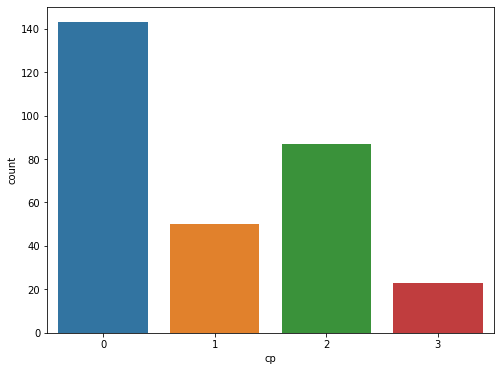

In [22]:
#visualize the frequency distribution
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="cp", data=df)
plt.show()

In [23]:
# Frequency distribution of "target" variable w.r.t. cp
# how many cp are there in dataset
df.groupby('cp')['target'].value_counts()


cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

### analysis of 'thalach' and 'target'variable

In [24]:
#unique thalach in 'thalach'
df['thalach'].nunique()

91

In [25]:
#frequency distribution of 'thalach'
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

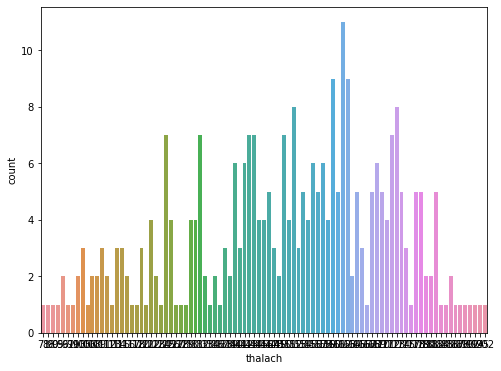

In [26]:
#visualize the frequency distribution
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="thalach", data=df)
plt.show()

In [27]:
# Frequency distribution of "target" variable w.r.t. thalach
# how many thalach are there in dataset
df.groupby('thalach')['target'].value_counts()


thalach  target
71       0         1
88       0         1
90       0         1
95       0         1
96       0         1
                  ..
190      1         1
192      1         1
194      1         1
195      0         1
202      1         1
Name: target, Length: 138, dtype: int64

# Multivariate  Analysis

### multivariate analysis are perform to discover opatterns and relationships in dataset

### interpretation of heatmap

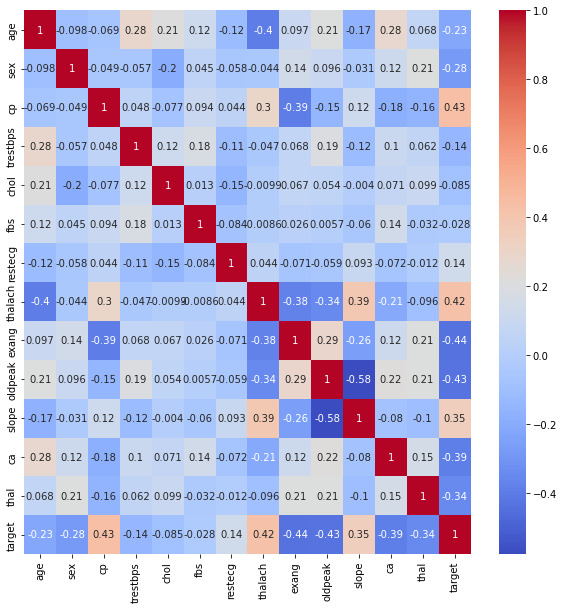

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap to show correlation between features
plt.figure(figsize=(10, 10))
sns.heatmap(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].corr(), annot=True, cmap='coolwarm')

plt.show()
   

# Analyzing invididual features wrt to 'target'

##### first analyze the target variable

1    165
0    138
Name: target, dtype: int64


C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


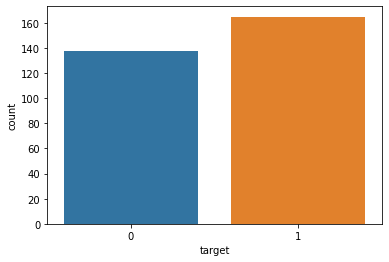

In [29]:
y = df["target"]
sns.countplot(y)

target_temp = df.target.value_counts()
print(target_temp)

In [30]:
print("Percentage of patients without heart problem:"+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problem:"+str(round(target_temp[1]*100/303,2)))

Percentage of patients without heart problem:45.54
Percentage of patients with heart problem:54.46


### We'll analyze 'sex','cp','fbs','restecg','exang','slope','ca','thal' features

### Analyze the sex feature

In [31]:
df['sex'].unique()

array([1, 0], dtype=int64)

#### We notice, that as expected,the sex feature has 2 unique feature

C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

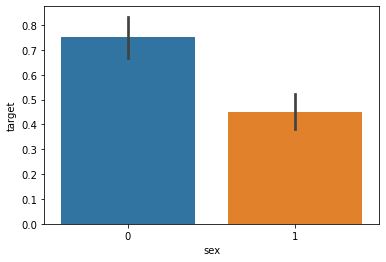

In [32]:
sns.barplot(df['sex'],y)

#### we notice that females are more likely to have heart problems than males

### Analyszing 'chest pain type' feature

In [33]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

#### the 'cp'feature has values from 0 to 3

C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='target'>

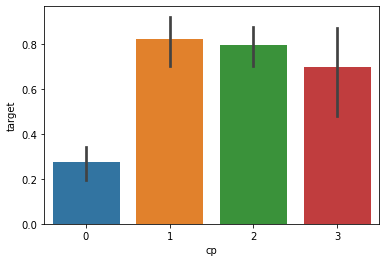

In [34]:
sns.barplot(df['cp'],y)

#### From this graph we analyze that people with typical angina are much less likely to have heart problems

### Analyszing 'FBS' feature

In [35]:
df['fbs'].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [36]:
df['fbs'].unique()

array([1, 0], dtype=int64)

C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='target'>

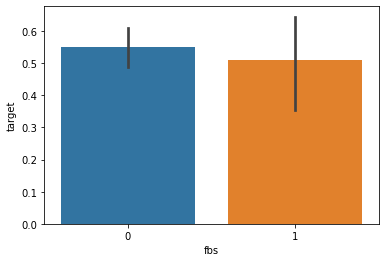

In [37]:
sns.barplot(df['fbs'],y)

#### nothing extraordinary here

### Analyzing the restecg feature

In [38]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='target'>

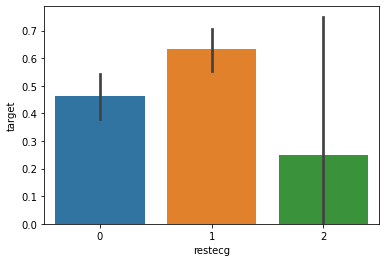

In [39]:
sns.barplot(df['restecg'],y)

#### We realize that people with restecg '1' ,'0' are much more likely to have heart disease that with restecg '2'

### Analyzing the exang feature

In [40]:
df['exang'].unique()

array([0, 1], dtype=int64)

C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='target'>

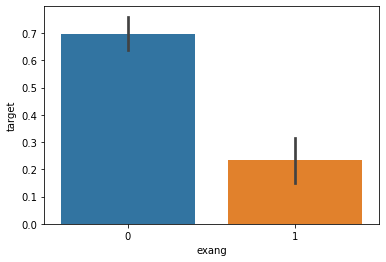

In [41]:
sns.barplot(df['exang'],y)

#### We realize that people with exang '1' that is Exercise induced angina are much more likely to have heart disease 

### Analyzing the slope feature

In [42]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='target'>

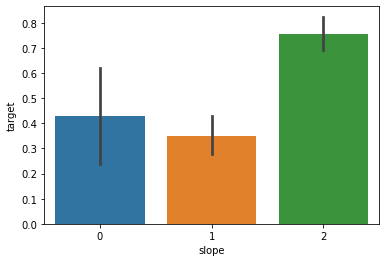

In [43]:
sns.barplot(df['slope'],y)

#### We realize that  slope '2' causes heart pain much more likely than slope '0' and '1'

### Analyzing the 'ca' feature

##### number of major vessels (0-3) colored by flourosopy

In [44]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='target'>

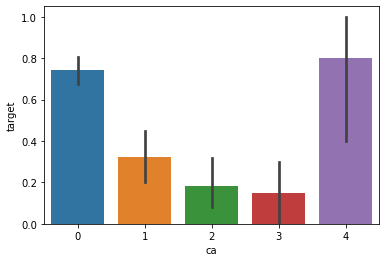

In [45]:
sns.barplot(df['ca'],y)

#### ca-=4 has astonishingly large number of heart patients

### Analyzing the 'thal' feature

In [46]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='target'>

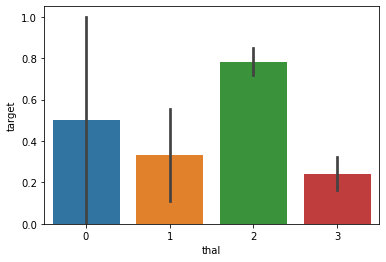

In [47]:
sns.barplot(df['thal'],y)

C:\Users\usama\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thal', ylabel='Density'>

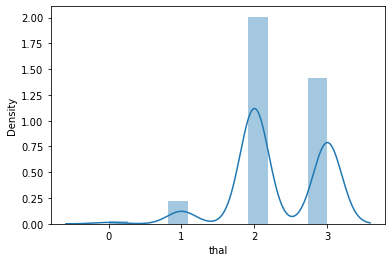

In [48]:
sns.distplot(df['thal'])

# Train / Test split

In [49]:
from sklearn.model_selection import train_test_split
features = df.drop("target",axis=1)
target = df["target"]
X_train,X_test,Y_train,Y_test = train_test_split(features , target , test_size=0.2,random_state=0)

In [50]:
X_train.shape

(242, 13)

In [51]:
X_test.shape

(61, 13)

In [52]:
Y_train.shape

(242,)

In [53]:
Y_test.shape

(61,)

In [54]:
y = df.target
X = df.drop('target' , axis=1)
print(y.shape)
print(X.shape)

(303,)
(303, 13)


# Summary of train test set

In [55]:
print("Shape Of X_train"+str(X_train.shape))
print("Shape Of Y_train"+str(Y_train.shape))
print("Shape Of X_test"+str(X_test.shape))
print("Shape Of Y_test"+str(Y_test.shape))


Shape Of X_train(242, 13)
Shape Of Y_train(242,)
Shape Of X_test(61, 13)
Shape Of Y_test(61,)


# Model Fitting

## Logistic Regression

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc
from sklearn.metrics import accuracy_score, recall_score , f1_score,precision_score
from sklearn.model_selection import train_test_split 

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\usama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
Y_pred_lr.shape

(61,)

# To Check the accuracy

In [59]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [60]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy Score achieved using Logistic Regression is "+ str(score_lr)+"%")

The accuracy Score achieved using Logistic Regression is 85.25%


# Confusion matrix and classification report

In [61]:
print(metrics.confusion_matrix(Y_pred_lr,Y_test))
print(classification_report(Y_pred_lr,Y_test))

[[22  4]
 [ 5 30]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.88      0.86      0.87        35

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [63]:
Y_pred_nb.shape

(61,)

# Checking Accuracy Score

In [64]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy Score achieved using Naive Bayes is "+ str(score_nb)+"%")

The accuracy Score achieved using Naive Bayes is 85.25%


# Confusion matrix and classification report

In [65]:
print(metrics.confusion_matrix(Y_pred_nb,Y_test))
print(classification_report(Y_pred_nb,Y_test))

[[21  3]
 [ 6 31]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.91      0.84      0.87        37

    accuracy                           0.85        61
   macro avg       0.84      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



# Support Vector Machine

In [66]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train,Y_train)

Y_pred_svm = sv.predict(X_test)

In [67]:
Y_pred_svm.shape

(61,)

# Checking Accuracy Score

In [68]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy Score achieved using SVM is "+ str(score_svm)+"%")

The accuracy Score achieved using SVM is 81.97%


# Confusion matrix and classification report

In [69]:
print(metrics.confusion_matrix(Y_pred_nb,Y_test))
print(classification_report(Y_pred_nb,Y_test))

[[21  3]
 [ 6 31]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.91      0.84      0.87        37

    accuracy                           0.85        61
   macro avg       0.84      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



# K Nearest Neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,Y_train)

Y_pred_knn = knn.predict(X_test)

In [71]:
Y_pred_knn.shape

(61,)

# Checking Accuracy Score

In [72]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy Score achieved using K Nearest Neighbors is "+ str(score_knn)+"%")

The accuracy Score achieved using K Nearest Neighbors is 67.21%


# Confusion matrix and classification report

In [73]:
print(metrics.confusion_matrix(Y_pred_knn,Y_test))
print(classification_report(Y_pred_knn,Y_test))

[[18 11]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        29
           1       0.68      0.72      0.70        32

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61



# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range (200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
        
dt = DecisionTreeClassifier(random_state=best_x)

dt.fit(X_train,Y_train)

Y_pred_dt = dt.predict(X_test)

In [75]:
Y_pred_dt.shape

(61,)

# Checking Accuracy Score

In [76]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy Score achieved using Decision Tree is "+ str(score_dt)+"%")

The accuracy Score achieved using Decision Tree is 81.97%


# Confusion matrix and classification report

In [77]:
print(metrics.confusion_matrix(Y_pred_dt,Y_test))
print(classification_report(Y_pred_dt,Y_test))

[[22  6]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# Random Forest 

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,Y_train)

Y_pred_rf = rf.predict(X_test)

In [79]:
Y_pred_rf.shape

(61,)

# Checking Accuracy Score

In [80]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy Score achieved using Random Forest is "+ str(score_rf)+"%")

The accuracy Score achieved using Random Forest is 85.25%


# Confusion matrix and classification report

In [81]:
print(metrics.confusion_matrix(Y_pred_rf,Y_test))
print(classification_report(Y_pred_rf,Y_test))

[[23  5]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# Final Score 

In [82]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]

algorithms = ["Logistic Regression","Navie Bayes","Support Vector Machine","K Nearest Neighbors","Decision Tree","Random Forest Tress"]

for i in range(len(algorithms)):
    print("The Accuracy Score Achieved Using "+algorithms[i]+" is: "+ str(scores[i])+" %")

The Accuracy Score Achieved Using Logistic Regression is: 85.25 %
The Accuracy Score Achieved Using Navie Bayes is: 85.25 %
The Accuracy Score Achieved Using Support Vector Machine is: 81.97 %
The Accuracy Score Achieved Using K Nearest Neighbors is: 67.21 %
The Accuracy Score Achieved Using Decision Tree is: 81.97 %
The Accuracy Score Achieved Using Random Forest Tress is: 85.25 %


C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy Score'>

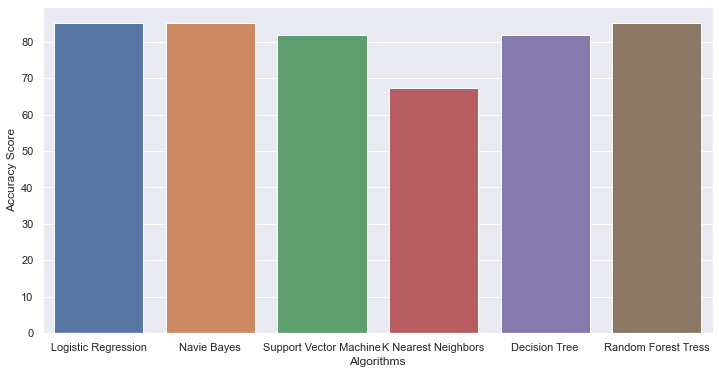

In [83]:
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

sns.barplot(algorithms,scores)

# So From Above Comparision , it can be visualized that Logistic Regression and Navie Bayes Gives the best Accuracy So I'm Gonna use Logistic Regression Model

### accuracy on training data

In [84]:
X_train_prediction = lr.predict(X_train)
training_data_accuracy = round(accuracy_score(X_train_prediction,Y_train)*100,2)
print("The Accuracy on training Data is: "+str(training_data_accuracy)+" %")

The Accuracy on training Data is: 85.12 %


### accuracy on test data

In [85]:
X_test_prediction = lr.predict(X_test)
test_data_accuracy = round(accuracy_score(X_test_prediction,Y_test)*100,2)
print("The Accuracy on test Data is: "+str(test_data_accuracy)+" %")

The Accuracy on test Data is: 85.25 %


# Building A Predictive System

In [86]:
input_data = [52,1,2,172,199,1,1,162,0,0.5,2,0,3]

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("The Person does not have a Heart Disease")
else:
    print("The Person has Heart Disease")


[1]
The Person has Heart Disease


C:\Users\usama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Saving The Trained Model

In [87]:
import pickle

In [88]:
filename = 'heart_model.sav'
pickle.dump(sv , open(filename, 'wb'))

### Loading The save model

In [89]:
load_model = pickle.load(open('heart_model.sav','rb'))

In [90]:
for column in X.columns:
    print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
